## Fake News Detection

 - data: fake/real news in csv file
 - encoding: tfidf_vectorizer
 - model: PassiveAggressive

In [971]:
# pip install numpy pandas sklearn

In [972]:
import tensorflow as tf
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import sequence

# MLP for the IMDB problem
from tensorflow.keras.datasets import imdb

from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from tensorflow.keras.layers import Concatenate, Dense, Dropout, Embedding, Input, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Input

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#added from later cell:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [973]:
#Read the data
df=pd.read_csv('C:\\Users\\attor\\Downloads\\news.csv')

#Get shape and head
display(df.shape)
df.head()

(6335, 4)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [974]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [975]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.4, random_state=7) # original test size : 0.2 , random_state : 7
print(x_train.shape)
print(x_test.shape)

(3801,)
(2534,)


In [976]:
# the first news
sample_txt = x_train[0:1]
for word in sample_txt:
    print(word)

Home › VIDEO › TREY GOWDY: “WHAT IN THE WORD IS LORETTA LYNCH DOING TALKING TO COMEY” TREY GOWDY: “WHAT IN THE WORD IS LORETTA LYNCH DOING TALKING TO COMEY” 4 SHARES Post navigation


## Text encoding 1: TF-IDF

In [977]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2, ngram_range=(1,2)) 
# max_df=0.7: ignore terms that have a document frequenc higher than the given threshold (corpus-specific stop words).
"""#ORIGINAL"""
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)



# chech the dataset
print(tfidf_train.shape)  # 5068 news, each encoded to 61651 long vector 
type(tfidf_train)         # scipy matrix

#ADDED BELOW
lr = LogisticRegression()
lr.fit(tfidf_train, y_train)

# Make predictions on the test set and evaluate accuracy
y_pred = lr.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

(3801, 195535)
Accuracy: 0.9159431728492502


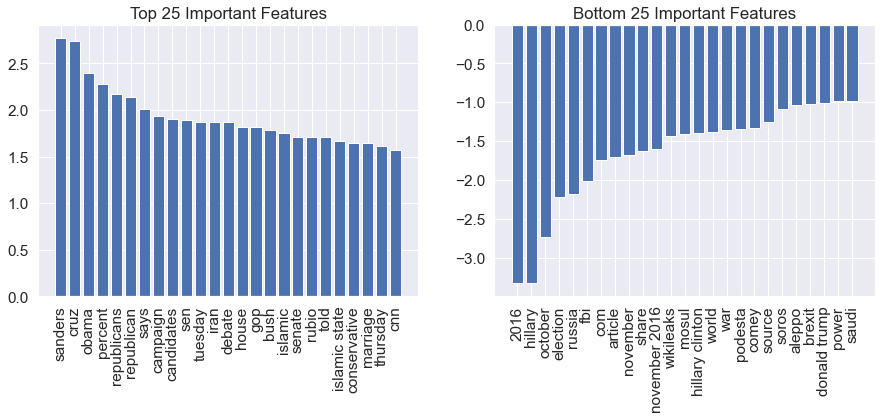

In [978]:
# Plot the coefficients
coefficients = lr.coef_.ravel()
feature_names = tfidf_vectorizer.get_feature_names()
sorted_coefficients = sorted(zip(coefficients, feature_names))
top_coefficients = sorted_coefficients[-25:]
bottom_coefficients = sorted_coefficients[:25]
top_coefficients.reverse()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar([x[1] for x in top_coefficients], [x[0] for x in top_coefficients])
plt.xticks(rotation=90)
plt.title("Top 25 Important Features")
plt.subplot(1, 2, 2)
plt.bar([x[1] for x in bottom_coefficients], [x[0] for x in bottom_coefficients])
plt.xticks(rotation=90)
plt.title("Bottom 25 Important Features")
plt.show()

In [979]:
# check the first news' encoding
sample_0 = tfidf_train[0, :].toarray()
print("Total words used:", sample_0[0].size)
print(list(sample_0[0]))

Total words used: 195535
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [980]:
# check how many non-zeros: this is the number of words used in the first news
non_zero = [ x for x in sample_0[0] if(x > 0)]
print("Total count of non-zero:", len(non_zero) )

Total count of non-zero: 16


In [981]:
"""# Create a tokenizer and fit on the training data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

# Convert the text data to sequences of integers
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)
"""

'# Create a tokenizer and fit on the training data\ntokenizer = Tokenizer()\ntokenizer.fit_on_texts(x_train)\n\n# Convert the text data to sequences of integers\ntrain_sequences = tokenizer.texts_to_sequences(x_train)\ntest_sequences = tokenizer.texts_to_sequences(x_test)\n'

In [982]:
"""maxlen = 100
train_sequences = pad_sequences(train_sequences, maxlen=maxlen, padding='post')
test_sequences = pad_sequences(test_sequences, maxlen=maxlen, padding='post')

# Create a Sequential model
model = Sequential()

# Add an Embedding layer
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 32
text_input = Input(shape=(maxlen,))
tfidf_input = Input(shape=(tfidf_train.shape[1],))

# Add an embedding layer for the text input
embedding_size = 32
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=maxlen)(text_input)
flattened_embedding = Flatten()(embedding_layer)

# Concatenate the embedding output with the tf-idf input
merged_inputs = Concatenate()([flattened_embedding, tfidf_input]) # added () before flattened....

# Add a dense layer and output layer
dense_layer = Dense(units=64, activation='relu')(merged_inputs)
output_layer = Dense(units=1, activation='sigmoid')(dense_layer)

# Define the model with inputs and output
model = Model(inputs=[text_input, tfidf_input], outputs=output_layer)


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

"""

"maxlen = 100\ntrain_sequences = pad_sequences(train_sequences, maxlen=maxlen, padding='post')\ntest_sequences = pad_sequences(test_sequences, maxlen=maxlen, padding='post')\n\n# Create a Sequential model\nmodel = Sequential()\n\n# Add an Embedding layer\nvocab_size = len(tokenizer.word_index) + 1\nembedding_size = 32\ntext_input = Input(shape=(maxlen,))\ntfidf_input = Input(shape=(tfidf_train.shape[1],))\n\n# Add an embedding layer for the text input\nembedding_size = 32\nembedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=maxlen)(text_input)\nflattened_embedding = Flatten()(embedding_layer)\n\n# Concatenate the embedding output with the tf-idf input\nmerged_inputs = Concatenate()([flattened_embedding, tfidf_input]) # added () before flattened....\n\n# Add a dense layer and output layer\ndense_layer = Dense(units=64, activation='relu')(merged_inputs)\noutput_layer = Dense(units=1, activation='sigmoid')(dense_layer)\n\n# Define the model with input

In [983]:
# Train the model
#model.fit([train_sequences, tfidf_train], y_train, epochs=10, validation_data=([test_sequences, tfidf_test], y_test))

In [984]:
"""loss, accuracy = model.evaluate([test_sequences, tfidf_test], y_test)
print(f'Accuracy: {accuracy}')"""

"loss, accuracy = model.evaluate([test_sequences, tfidf_test], y_test)\nprint(f'Accuracy: {accuracy}')"

In [985]:
"""
# create a neural network with an embedding layer

# extract the text data as a list
texts = df['text'].tolist()

# initialize a tokenizer
tokenizer = Tokenizer()

# fit the tokenizer on the text data
tokenizer.fit_on_texts(texts)

# get the vocab size
vocab_size = len(tokenizer.word_index) + 1
# define the maximum length of the input sequences
max_length = 100

# define the dimensionality of the embedding space
embedding_dim = 50

#train_sequences = tokenizer.texts_to_sequences(tfidf_train)

# Pad sequences to the same length

# Define the input shape for the embedded layer
input_shape = tfidf_train.shape[1]

# Create the embedded layer
embedding_layer = Embedding(input_dim=input_shape, output_dim=16, input_length=input_shape)

# Define the model
inputs = Input(shape=(input_shape,))
embedded = embedding_layer(inputs)
flatten = Flatten()(embedded)
outputs = Dense(1, activation='sigmoid')(flatten)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

"""

"\n# create a neural network with an embedding layer\n\n# extract the text data as a list\ntexts = df['text'].tolist()\n\n# initialize a tokenizer\ntokenizer = Tokenizer()\n\n# fit the tokenizer on the text data\ntokenizer.fit_on_texts(texts)\n\n# get the vocab size\nvocab_size = len(tokenizer.word_index) + 1\n# define the maximum length of the input sequences\nmax_length = 100\n\n# define the dimensionality of the embedding space\nembedding_dim = 50\n\n#train_sequences = tokenizer.texts_to_sequences(tfidf_train)\n\n# Pad sequences to the same length\n\n# Define the input shape for the embedded layer\ninput_shape = tfidf_train.shape[1]\n\n# Create the embedded layer\nembedding_layer = Embedding(input_dim=input_shape, output_dim=16, input_length=input_shape)\n\n# Define the model\ninputs = Input(shape=(input_shape,))\nembedded = embedding_layer(inputs)\nflatten = Flatten()(embedded)\noutputs = Dense(1, activation='sigmoid')(flatten)\nmodel = tf.keras.Model(inputs=inputs, outputs=outputs

In [986]:
"""# Train the model
#model.fit(tfidf_train.toarray(), y_train, epochs=10, validation_data=(tfidf_test.toarray(), y_test))

batch_size = 32
num_epochs = 10
model.fit(tfidf_train.toarray(), y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(tfidf_test.toarray(), y_test))"""

'# Train the model\n#model.fit(tfidf_train.toarray(), y_train, epochs=10, validation_data=(tfidf_test.toarray(), y_test))\n\nbatch_size = 32\nnum_epochs = 10\nmodel.fit(tfidf_train.toarray(), y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(tfidf_test.toarray(), y_test))'

### Model 1: PassiveAggressive

In [987]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=100, C=0.1) # changed max_iter from 50 , 'C' was also added

# training
pac.fit(tfidf_train,y_train)
#pac_pred = pac.predict(tfidf_test)

# Train the RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, max_depth=500, max_features= 'sqrt', random_state= 42)
rfc.fit(tfidf_train, y_train)

# Predict using the RandomForestClassifier
#rfc_pred = rfc.predict(tfidf_test)

RandomForestClassifier(max_depth=500, max_features='sqrt', n_estimators=500,
                       random_state=42)

In [988]:
# layers.Embedding(vocab, embeding_size, input_length_each_sample))

# create model
#model = keras.Sequential()
#model.add(layers.Embedding(vocab, 32, input_length=max_words))           # max_words = 500, each word embeded to 32 real numbers
#model.add(layers.Flatten())                                              # 32*500 = 16000 for each input
#model.add(layers.Dense(100, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()

In [989]:
# traing the model
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)

### Report

In [990]:
# function for Report and Confusion Matrix Heatmap    
# plotting
#import matplotlib.pyplot as plt
import seaborn as sns
# machine learning 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def report_heatmap(y_pred):
    """
    print report and plot the confusion matrix
    
    parameters: y_pred, a list of predicted labels
    
    return: None
    
    
    """
    # overall accuracy 
    acc = accuracy_score(y_test, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")    
    
    # report
    print(classification_report(y_test, y_pred))
   
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Confusion Matrix Heatmap
    labels = ["0", "1"]
    plt.figure(1, figsize=(8, 5))

    plt.title("Confusion Matrix")

    sns.set(font_scale=1.4)
    ax = sns.heatmap(cm, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}) # Yellow + Green + Blue

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    ax.set(ylabel="True Label", xlabel="Predicted Label")

    plt.show( )



Overall Accuracy: 94.24%
--------------------------
              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94      1270
        REAL       0.94      0.94      0.94      1264

    accuracy                           0.94      2534
   macro avg       0.94      0.94      0.94      2534
weighted avg       0.94      0.94      0.94      2534



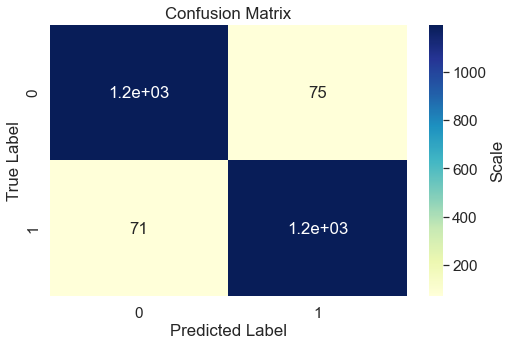

In [991]:
# Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)

# display report
report_heatmap(y_pred)


In [992]:

y_pred1=pac.predict(tfidf_test)
y_pred2=rfc.predict(tfidf_test)

In [993]:
def report_heatmap_random_pas(y_pred2):

    """print report and plot the confusion matrix
    
    parameters: y_pred, a list of predicted labels
    
    return: None
    """
    
    
    # overall accuracy 
    acc1 = accuracy_score(y_test, y_pred2)
    print( f'Overall Accuracy: {acc1*100:.2f}%' )
    print("--------------------------")    
    
    # report
    print(classification_report(y_test, y_pred2))
   
    # confusion matrix
    cm2 = confusion_matrix(y_test, y_pred2) 

    # Confusion Matrix Heatmap
    labels = ["0", "1"]
    plt.figure(1, figsize=(8, 5))

    plt.title("Confusion Matrix")

    sns.set(font_scale=1.4)
    ax1 = sns.heatmap(cm2, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}) # Yellow + Green + Blue

    ax1.set_xticklabels(labels)
    ax1.set_yticklabels(labels)

    ax1.set(ylabel="True Label", xlabel="Predicted Label")

    plt.show( )

Overall Accuracy: 90.69%
--------------------------
              precision    recall  f1-score   support

        FAKE       0.91      0.90      0.91      1270
        REAL       0.90      0.91      0.91      1264

    accuracy                           0.91      2534
   macro avg       0.91      0.91      0.91      2534
weighted avg       0.91      0.91      0.91      2534



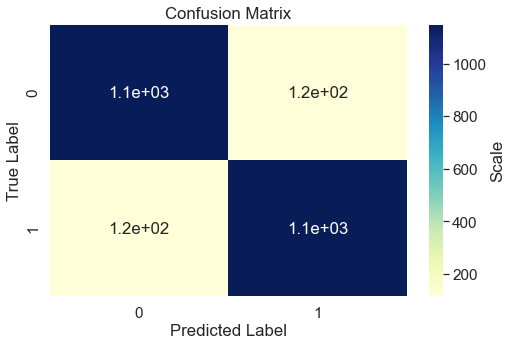

In [994]:

#sns.heatmap(combined_cm, annot=True, cmap="YlGnBu", fmt='g',xticklabels=['Fake', 'Real'],yticklabels=['Fake', 'Real'])
# display report
report_heatmap_random_pas(y_pred2)


In [995]:
### COMBINED ###
y_pred_halved = [max(x) for x in zip(y_pred1, y_pred2)]

# Overall accuracy and classification report for PassiveAggressiveClassifier
acc1 = accuracy_score(y_test, y_pred1)
print('PassiveAggressiveClassifier:')
print(f'Overall Accuracy: {acc1*100:.2f}%')
print('--------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

# Overall accuracy and classification report for RandomForestClassifier
acc2 = accuracy_score(y_test, y_pred2)
print('RandomForestClassifier:')
print(f'Overall Accuracy: {acc2*100:.2f}%')
print('--------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

# Overall accuracy and classification report for combined predictions
acc_halved = accuracy_score(y_test, y_pred_halved)
print('Combined predictions:')
print(f'Overall Accuracy: {acc_halved*100:.2f}%')
print('--------------------------')
print(classification_report(y_test, y_pred_halved))

PassiveAggressiveClassifier:
Overall Accuracy: 94.24%
--------------------------
Confusion Matrix:
[[1195   75]
 [  71 1193]]
              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94      1270
        REAL       0.94      0.94      0.94      1264

    accuracy                           0.94      2534
   macro avg       0.94      0.94      0.94      2534
weighted avg       0.94      0.94      0.94      2534

RandomForestClassifier:
Overall Accuracy: 90.69%
--------------------------
Confusion Matrix:
[[1149  121]
 [ 115 1149]]
              precision    recall  f1-score   support

        FAKE       0.91      0.90      0.91      1270
        REAL       0.90      0.91      0.91      1264

    accuracy                           0.91      2534
   macro avg       0.91      0.91      0.91      2534
weighted avg       0.91      0.91      0.91      2534

Combined predictions:
Overall Accuracy: 92.30%
--------------------------
              precision  

In [996]:
# end

### REF: 
- https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/